In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

historical_weather = pd.read_csv('../AucklandMotatStationNiwa_08June24/auckland_rain_temp_statsNZ_motatNiwa_1966to2024.csv')

historical_weather.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1/1/1966,0.0,18.0,22.2,13.9
1,2/1/1966,26.2,20.5,23.9,17.1
2,3/1/1966,0.0,20.3,23.5,17.1
3,4/1/1966,0.0,20.3,24.4,16.2
4,5/1/1966,1.3,20.6,23.4,17.8


In [12]:
historical_weather.tail()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
21267,3/24/2024,0.0,17.8,23.3,15.8
21268,3/25/2024,0.8,18.0,22.9,13.0
21269,3/26/2024,0.2,19.6,24.4,17.2
21270,3/27/2024,0.2,19.9,24.1,14.7
21271,3/28/2024,3.2,16.8,22.6,12.5


In [13]:
historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21272 entries, 0 to 21271
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          21272 non-null  object 
 1   Rainfall(mm)  21272 non-null  float64
 2   Tavg          21272 non-null  float64
 3   Tmax          21272 non-null  float64
 4   Tmin          21272 non-null  float64
dtypes: float64(4), object(1)
memory usage: 831.1+ KB


In [14]:
historical_weather['Date'] = pd.to_datetime(historical_weather['Date'], format='%d/%m/%Y', errors='coerce')


In [15]:
# Extract year from 'Date'
historical_weather['Year'] = historical_weather['Date'].dt.year

# Group by 'Year' and calculate annual statistics
annual_stats = historical_weather.groupby('Year').agg({
    'Rainfall(mm)': 'sum',
    'Tavg': 'mean',
    'Tmax': 'max',
    'Tmin': 'min'
}).reset_index()

# Display the annual statistics
print(annual_stats.head())

     Year  Rainfall(mm)       Tavg  Tmax  Tmin
0  1966.0        1288.9  14.685205  27.6   0.3
1  1967.0        1236.9  14.913151  27.4  -0.3
2  1968.0        1248.9  14.631148  27.2   1.6
3  1969.0        1087.8  14.515342  26.6   0.0
4  1970.0        1132.2  15.523288  28.7   0.3


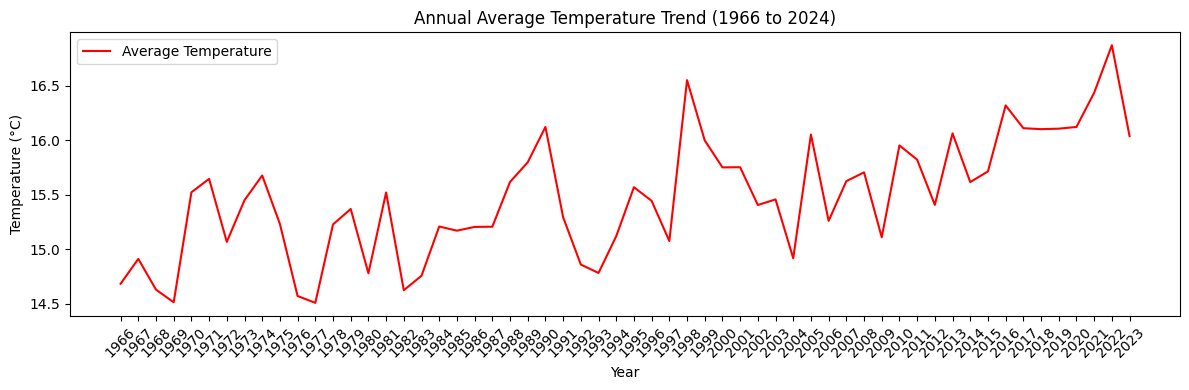

In [30]:
# Exclude 2024 from the analysis
annual_stats = annual_stats[annual_stats['Year'] != 2024]

# Plot annual average temperature trend
plt.figure(figsize=(12, 4))

plt.plot(annual_stats['Year'], annual_stats['Tavg'], color='red', label='Average Temperature')
plt.title('Annual Average Temperature Trend (1966 to 2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

# Set xticks to show every year
plt.xticks(annual_stats['Year'], rotation=45)

plt.tight_layout()
plt.show()

In [27]:
temp_data_2023 = historical_weather[historical_weather['Year'] == 2023]['Tavg']
print(temp_data_2023)

20819    19.1
20820    18.1
20821    19.8
20822    19.4
20823    20.4
         ... 
21160    16.9
21161    17.0
21162    17.8
21163    16.8
21164    15.6
Name: Tavg, Length: 144, dtype: float64


In [28]:
temp_data_2024 = historical_weather[historical_weather['Year'] == 2024]['Tavg']
print(f"Number of temperature readings for 2024: {temp_data_2024.count()}")


Number of temperature readings for 2024: 36


In [29]:
plt.figure(figsize=(12, 4))
plt.bar(annual_stats['Date'], annual_stats['Rainfall(mm)'], color='blue', label='Total Rainfall')
plt.title('Annual Total Rainfall Trend (1966 to 2024)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)

plt.xticks(annual_stats['Date'], rotation=90)

plt.tight_layout()
plt.show()

KeyError: 'Date'

<Figure size 1200x400 with 0 Axes>

In [ ]:
# 2. Rainfall Trend Analysis
Auckland_historical_weather['Tavg'] = pd.to_numeric(Auckland_historical_weather['Rainfall(mm)'], errors='coerce')
Auckland_historical_weather['Date'] = pd.to_datetime(Auckland_historical_weather['Date'])
filtered_data = Auckland_historical_weather[(Auckland_historical_weather['Date'] >= '1966-03-01') & (Auckland_historical_weather['Date'] <= '2024-03-31')]
annual_stats = filtered_data.groupby(filtered_data['Date'].dt.year).agg({'Tavg': 'mean', 'Tmin': 'min', 'Tmax': 'max'})

plt.figure(figsize=(20, 5))
plt.plot(annual_stats.index, annual_stats['Tavg'], color='orange', label='Average Temperature')
plt.title('Annual Average Temperature Trend (March 1966 to March 2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(annual_stats.index, rotation=45)  # Show every year on x-axis
plt.legend()
plt.grid(True)
plt.xlim(annual_stats.index.min(), annual_stats.index.max())

plt.show()

NameError: name 'Auckland_historical_weather' is not defined

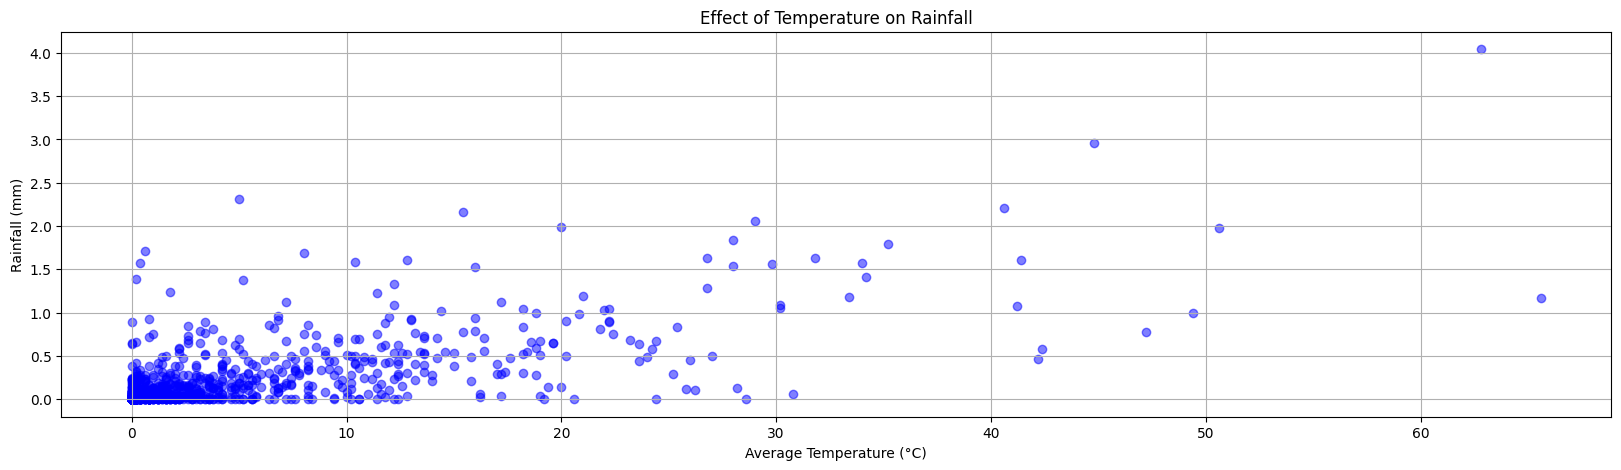

In [ ]:
# 3. Effect of Temperature on Rainfall
plt.figure(figsize=(20, 5))
plt.scatter(Auckland_historical_weather['Tavg'], Auckland_historical_weather['Rain(mm)'], color='blue', alpha=0.5)
plt.title('Effect of Temperature on Rainfall')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

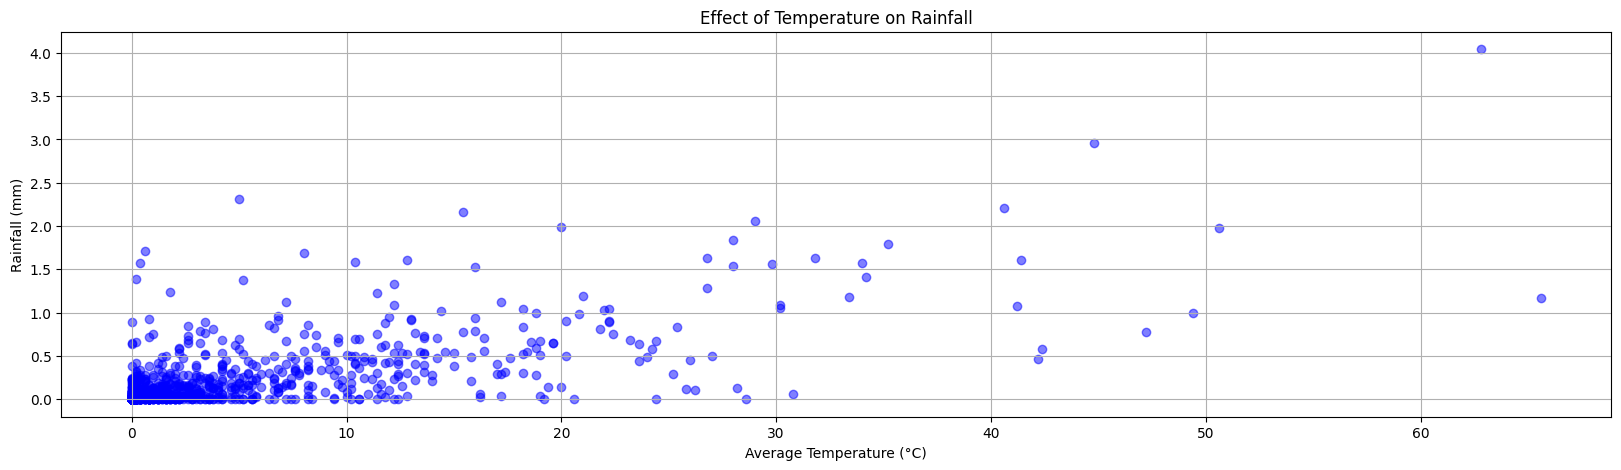

In [ ]:
# 3. Effect of Temperature on Rainfall
plt.figure(figsize=(20, 5))
plt.scatter(Auckland_historical_weather['Tavg'], Auckland_historical_weather['Rain(mm)'], color='blue', alpha=0.5)
plt.title('Effect of Temperature on Rainfall')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

In [ ]:
# Convert "Tavg" column to numeric, coerce errors to NaN
Auckland_historical_weather['Tavg'] = pd.to_numeric(Auckland_historical_weather['Tavg'], errors='coerce')

# Group data by year and calculate annual mean temperature, min, and max
annual_stats = Auckland_historical_weather.groupby(Auckland_historical_weather['Date'].dt.year).agg({'Tavg': 'mean', 'Tmin': 'min', 'Tmax': 'max'})

# Create a new figure and axis object
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot the annual mean temperature, min, and max
ax1.plot(annual_stats.index, annual_stats['Tavg'], color='orange', label='Mean Temperature', zorder=2)
ax1.plot(annual_stats.index, annual_stats['Tmin'], color='green', label='Min Temperature', zorder=2)
ax1.plot(annual_stats.index, annual_stats['Tmax'], color='red', label='Max Temperature', zorder=2)

# Set labels and title for the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Annual Temperature Trend')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the histogram of rainfall
ax2 = ax1.twinx()
n_years = len(annual_stats.index)
bar_width = 0.8  

# Plot the rainfall histogram with adjusted z-order
ax2.bar(Auckland_historical_weather['Date'].dt.year, Auckland_historical_weather['Rain(mm)'], color='lightblue', alpha=0.5, width=bar_width, zorder=1)
ax2.set_ylabel('Rainfall (mm)')
# Rotate x-labels by 45 degrees and set step size to show every 5th year
plt.xticks(rotation=45, ticks=annual_stats.index[::5])

# Adjust x-axis limits to remove extra space
ax1.set_xlim(annual_stats.index.min(), annual_stats.index.max())

# Adjust layout to reduce whitespace
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

annual_stats = Auckland_historical_weather.groupby('Year').agg({'Tavg': 'mean', 'Rain(mm)': 'sum'})
seasonal_stats = Auckland_historical_weather.groupby(['Year', 'Season']).agg({'Tavg': 'mean', 'Rain(mm)': 'sum'}).reset_index()


# Plot the seasonal temperature against seasonal rainfall
plt.figure(figsize=(10, 5))
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    seasonal_data = seasonal_stats[seasonal_stats['Season'] == season]
    plt.scatter(seasonal_data['Tavg'], seasonal_data['Rain(mm)'], label=season)

plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Seasonal Temperature vs Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Plot the annual temperature against annual rainfall
plt.figure(figsize=(10, 5))
plt.scatter(annual_stats['Tavg'], annual_stats['Rain(mm)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Annual Temperature vs Rainfall')
plt.grid(True)
plt.show()

KeyError: 'Year'

In [ ]:
# Extract year from the date
Auckland_historical_weather['Year'] = Auckland_historical_weather['Date'].dt.year

# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new 'Season' column
Auckland_historical_weather['Season'] = Auckland_historical_weather['Date'].dt.month.apply(get_season)

# Group data by year and calculate annual mean temperature and total rainfall
annual_stats = Auckland_historical_weather.groupby('Year').agg({'Tavg': 'mean', 'Rain(mm)': 'sum'})

# Group data by season and calculate mean temperature and total rainfall for each season
seasonal_stats = Auckland_historical_weather.groupby(['Year', 'Season']).agg({'Tavg': 'mean', 'Rain(mm)': 'sum'}).reset_index()

# Plot the seasonal mean temperature
plt.figure(figsize=(10, 5))
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    seasonal_data = seasonal_stats[seasonal_stats['Season'] == season]
    plt.plot(seasonal_data['Year'], seasonal_data['Tavg'], label=f'{season} Temperature')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Seasonal Temperature Trend')
plt.legend()
plt.grid(True)
plt.show()

# Plot the seasonal total rainfall
plt.figure(figsize=(10, 5))
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    seasonal_data = seasonal_stats[seasonal_stats['Season'] == season]
    plt.bar(seasonal_data['Year'], seasonal_data['Rain(mm)'], alpha=0.5, label=f'{season} Rainfall')

plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Seasonal Rainfall Trend')
plt.legend()
plt.grid(True)
plt.show()
